Epoch: 50 cost= 6.624440707


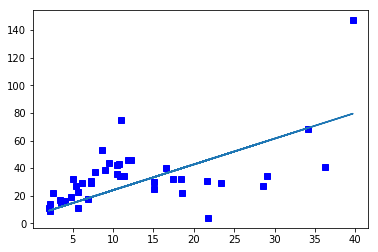

In [87]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import pandas as pd

file = r'LinearRegression.csv'
df = pd.read_csv(file)
x =df['X']
y =df['Y']

train_X = numpy.asarray(x)
train_Y = numpy.asarray(y)
n = len(df['X'])

X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Construct a linear model
Y_prediction = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_mean(tf.square(Y_prediction - Y))/(n)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(tf.global_variables_initializer())
    for epoch in range(50):
        total_loss = 0
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            l = sess.run(cost, feed_dict={X: x, Y:y})
            total_loss += l
    print("Epoch:", '%02d' % (epoch+1), "cost=", "{:.9f}".format(total_loss/n))

    # plot the graph
    plt.plot(train_X, train_Y,'sb')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b))
    plt.show()